In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2022-04-06 09:57:33.767171: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
test_dir = 'classification_dataset/new/test/'
IMAGE_WIDTH = 32 
IMAGE_HEIGHT = 32
BATCH_SIZE = 16


In [12]:
testgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = testgen.flow_from_directory(
    test_dir,
    shuffle=True,
    batch_size = BATCH_SIZE,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
)

Found 66119 images belonging to 34 classes.


In [9]:
model = tf.keras.models.load_model('models trained/model_9859/model_9859.h5')
!clear

In [13]:
model.evaluate(test_generator)

2022-04-03 13:29:35.868587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-03 13:29:35.887413: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799925000 Hz
2022-04-03 13:29:36.213263: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-04-03 13:29:36.776935: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2022-04-03 13:29:37.515778: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-04-03 13:29:38.086539: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


   7/4133 [..............................] - ETA: 1:33 - loss: 0.0637 - accuracy: 0.9911 

2022-04-03 13:29:38.497452: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-03 13:29:38.547093: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


4133/4133 [==============================] - 91s 21ms/step - loss: 0.0619 - accuracy: 0.9859


2022-04-03 13:31:06.714232: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.11GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-03 13:31:06.760308: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.11GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


[0.061900340020656586, 0.9858739376068115]

In [4]:
def show_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('loss.png')
    plt.show()

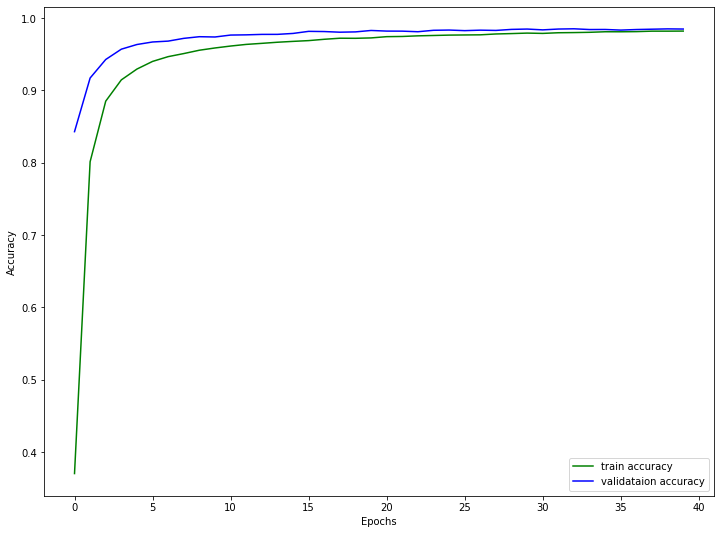

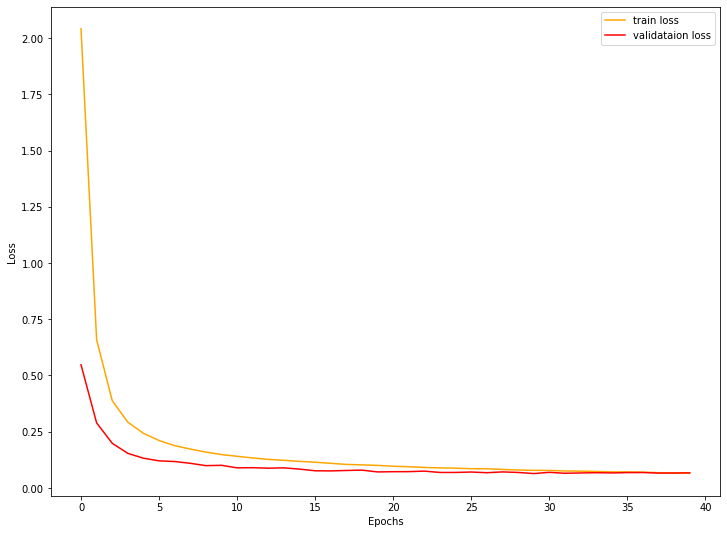

In [5]:
results = np.loadtxt("models trained/model_9859/model_9859.csv", delimiter=",")

train_acc = results[0]
valid_acc = results[1]
train_loss = results[2]
valid_loss = results[3]


show_plots(train_acc,valid_acc,train_loss,valid_loss)


In [16]:
import os
from PIL import Image
import PIL
dir = '/home/mihai/Curso Spark/Tema 6. Clústers/Ejercicios/Diapositivas/'
lst = sorted(os.listdir(dir))



In [17]:
c = []
for i in lst:
    if ".png" in i:
        c.append(i)
# print(c)
print(len(c))
lst = c

18


In [18]:
# Rename
cons = 1
for index,item in enumerate(c):
    os.rename(dir + item, dir + str(index+cons) + '.png')

In [25]:
image = Image.open(dir + lst[12])
image.size
print(image.size)
if image.size == (2560, 1440):
    res_img = image.resize((1920,1080))
    print(res_img.size)

(2560, 1440)
(1920, 1080)


In [28]:
# Resize
for item in lst:
    image = Image.open(dir + item)
    if image.size == (2560, 1440):
        res_img = image.resize((1920,1080))
        res_img.save(dir + item)